In [ ]:
# For a HD quality demo video, please refer https://youtu.be/cqIFZBcZdvo

In [ ]:
# Kaggle link for the dataset of sentiment analysis (To be downloaded before use)
# https://www.kaggle.com/code/aherparesh/sentiment-analysis-on-amazon-product-rnn-97-acc/data

# Getting trending topics from Google trends

In [72]:
import pytrends
from pytrends.request import TrendReq
import pandas as pd
import time
import datetime
from datetime import datetime, date, time

heading = input("Enter the topic:")
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = [heading]
pytrends.build_payload(kw_list, cat=0, timeframe='today 1-m', geo='IN', gprop='')

# ans = pytrends.related_topics()
# ans
# ans[x]['rising']
# ans['phones']['top']

ans = pytrends.related_queries()
trending_keywords = ans[heading]['rising']['query']
trending_values=ans[heading]['rising']['value']
#remove unecessary keywords
trending_keywords=list(trending_keywords)
trending_values=list(trending_values)
trend_score={}
for i in range(len(trending_keywords)):
    trend_score[trending_keywords[i]]=trending_values[i]
# print(trending_keywords)
unecessary_keywords=['amazon','amazon india','meesho','types of t shirts for men']
for word in unecessary_keywords:
    if word in trending_keywords:
        trending_keywords.remove(word)

trending_keywords.reverse()
trending_keywords=trending_keywords[:10]


Enter the topic:Men Shirts


In [73]:
rising_values={}
for trending in trending_keywords:
    rising_values[trending]=trend_score[trending]

In [74]:
import matplotlib.pyplot as plt
import urllib.request
import re

urls_dict = {}
for i in trending_keywords:
    urls = []
    pytrends.build_payload([i], cat=0, timeframe='today 1-m', geo='', gprop='')

    search = i
    search = search + " " + heading
    search = search.replace(" ","+")

    html = urllib.request.urlopen("https://www.youtube.com/results?search_query="+search)
    video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
    counter = 0
    for x in video_ids:
        if counter>5:
            break
        urls.append("https://www.youtube.com/watch?v=" + x)
        counter += 1
    urls_dict[i]=urls;

# Scraping comments

In [75]:
!pip install selenium
!pip install bs4
from selenium import webdriver
from selenium.webdriver import Chrome
from bs4 import BeautifulSoup
import time

product_dicts=[]
def ScrapeComment(url,name):
    op = webdriver.ChromeOptions()
    driver = Chrome()

    #open the webpage
    driver.get(url)
    prev_h = 0
    while True:
        height = driver.execute_script("""
                function getActualHeight() {
                    return Math.max(
                        Math.max(document.body.scrollHeight, document.documentElement.scrollHeight),
                        Math.max(document.body.offsetHeight, document.documentElement.offsetHeight),
                        Math.max(document.body.clientHeight, document.documentElement.clientHeight)
                    );
                }
                return getActualHeight();
            """)
        driver.execute_script(f"window.scrollTo({prev_h},{prev_h + 200})")
        # fix the time sleep value according to your network connection
        time.sleep(1)
        prev_h +=200  
        if prev_h >= height:
            break
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()
    title_text_div = soup.select_one('#container h1')
    title = title_text_div and title_text_div.text
    comment_div = soup.select("#content #content-text")
    comment_list = [x.text for x in comment_div]
    print(title, comment_list)
    product_dicts.append({name:comment_list})

# Getting YouTube video IDs

In [76]:
import urllib.request
import re

urls = []
for x in trending_keywords:
    search = x+heading
    search = search.replace(" ","+")

    html = urllib.request.urlopen("https://www.youtube.com/results?search_query="+search)
    video_ids = re.findall(r"watch\?v=(\S{11})", html.read().decode())
#     for i in video_ids:
#         urls.append("https://www.youtube.com/watch?v=" + i)
    ScrapeComment("https://www.youtube.com/watch?v="+video_ids[0],x)

# print(urls)

6 Best Budget Full Sleeves T-Shirts | 6 T-shirts For Just ₹2000 | T-Shirts Under ₹300 ['Bhai comfort ke basis pe konsi waali t-shirt ka fabric sabse acha rahega??', 'Great work bro', 'Links are not working bro\nWhere I can find the link for a  football t-shirt...', '1st t shirt ka link open nhi ho rha... please help me...i loved this t shirt.i want to buy it', 'Hi brother I am your subscriber from Gurgaon thank you  stay safe', 'Bhai aap jo product ka rate dal kar dikhate ho ye bahut achha hai.... Kharidne me asan hota hai....', 'Superb...Very helpful', 'Sir make new vedios on new full sleve t shirts', 'Link nhi dale ho', '2nd tshirt ka link kaha h?', 'Link kahan hai', 'Nice', 'Congratulations 13k', 'Bhai maja nahi aya...still pressed like button ...keep improving', "Bro make videos on budget watch'", 'Bro how to increase volume of mah hair pls reply ', 'Bhai mujhe matic fabric me chahiye. Ye jo tee-shirt ka fabric aata h wo hojry type aata h. Jaise baniyan type wala.', 'Superb', 'Plea

6 Best Budget Full Sleeves T-Shirts | 6 T-shirts For Just ₹2000 | T-Shirts Under ₹300 ['Bhai comfort ke basis pe konsi waali t-shirt ka fabric sabse acha rahega??', 'Great work bro', 'Links are not working bro\nWhere I can find the link for a  football t-shirt...', '1st t shirt ka link open nhi ho rha... please help me...i loved this t shirt.i want to buy it', 'Hi brother I am your subscriber from Gurgaon thank you  stay safe', 'Bhai aap jo product ka rate dal kar dikhate ho ye bahut achha hai.... Kharidne me asan hota hai....', 'Superb...Very helpful', 'Sir make new vedios on new full sleve t shirts', 'Link nhi dale ho', '2nd tshirt ka link kaha h?', 'Link kahan hai', 'Nice', 'Congratulations 13k', 'Bhai maja nahi aya...still pressed like button ...keep improving', "Bro make videos on budget watch'", 'Bro how to increase volume of mah hair pls reply ', 'Bhai mujhe matic fabric me chahiye. Ye jo tee-shirt ka fabric aata h wo hojry type aata h. Jaise baniyan type wala.', 'Superb', 'Plea

Latest Hawaiian shirts for men/men fashion shirt 2020 ['incredible ... presentation !! keep this going  :-3', 'Some beautiful and creative shirts.', 'Awesome ', 'Very beautiful 🇦🇺', '0:11 and 1:00 - LOVE IT!', 'Where can i get this shirt', 'How can they be purchased??', 'price plz', 'do you have for woman', 'Valo', 'Very nice', 'Vary nice', 'Vary nice']
5 "ALPHA" Ways To Wear A FLANNEL Shirt! (Men's Style Tips) ['Flannels have been my go-to since highschool lol. They’re pretty versatile and can go with pretty much all of seasons and almost any kind of weather. Glad you made this vid', "LOVE my flannel!  It's definitely my go-to choice for casual fall attire, especially with the layered look.", 'Aaron, you used to put a premium on quality brands at a decent price, but a lot of the products you’re floating now are impractical for most of us with a budget. $99 for a casual flannel shirt is pretty steep, especially when you can get several outfits of decent fit at Marshall’s for that. I re

GAP Men Green & Black Regular Fit Checked Casual Shirt []
10 BEST BEWAKOOF T-SHIRTS HAUL FOR MEN 🔥  AMAZON HAUL REVIEW 2022 | ONE CHANCE ['Woahhh what a energy \nThank you ', 'your energy is mind-blowing', 'Who else hates cocacola t-shirts?', 'Full of energy', 'My fvrt tshirts \n5:02 simple tshirt\n12:25 game over tshirt\n14:10 jerry tshirt\n15:15 peace out', 'KGF tshirt was just ', "I have that peace out t shirt and it's awesome trust me it's worth it.", 'Bro need after wash reviews of the tees.. the collection you review here.. kapde new bohot acche lagte hain.. lekin asli quality pata chalti hai wash ke baad.. hope u like the content idea..', 'Bhai your energy is amazing no doubt , your collection are also good but mai aapko 3 min se zyda nai sunsakta you are a little loud  soo please try to make it minimal ️', 'I love Tom n Jerry  \nI have that last red colour t shirt with Jerry on pocket ', "Bro make a video on men's full sleeve shirts ", 'I want fear of god hoodie like zayn malik

In [77]:
print(product_dicts)


[{'full sleeve t shirts': ['Bhai comfort ke basis pe konsi waali t-shirt ka fabric sabse acha rahega??', 'Great work bro', 'Links are not working bro\nWhere I can find the link for a  football t-shirt...', '1st t shirt ka link open nhi ho rha... please help me...i loved this t shirt.i want to buy it', 'Hi brother I am your subscriber from Gurgaon thank you  stay safe', 'Bhai aap jo product ka rate dal kar dikhate ho ye bahut achha hai.... Kharidne me asan hota hai....', 'Superb...Very helpful', 'Sir make new vedios on new full sleve t shirts', 'Link nhi dale ho', '2nd tshirt ka link kaha h?', 'Link kahan hai', 'Nice', 'Congratulations 13k', 'Bhai maja nahi aya...still pressed like button ...keep improving', "Bro make videos on budget watch'", 'Bro how to increase volume of mah hair pls reply ', 'Bhai mujhe matic fabric me chahiye. Ye jo tee-shirt ka fabric aata h wo hojry type aata h. Jaise baniyan type wala.', 'Superb', 'Please make a video regarding current myntra sale please.\n\nI w

# Spam detection

In [78]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [79]:
data=pd.read_csv('./Spam dataset.csv')
ham_msg = data[data.Category =='ham']
spam_msg = data[data.Category=='spam']
ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)
print(ham_msg.shape,spam_msg.shape)
balanced_data=ham_msg.append(spam_msg).reset_index(drop=True)
balanced_data['label']=balanced_data['Category'].map({'ham':0,'spam':1})
train_msg, test_msg, train_labels, test_labels =train_test_split(balanced_data['Message'],balanced_data['label'],test_size=0.2,random_state=434)
vocab_size=500
oov_tok='<OOV>'
max_len=50
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)
word_index=token.word_index
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16,input_length=50),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')
epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(Trainning_pad, train_labels ,validation_data=(Testing_pad, test_labels),epochs=epoch,callbacks=[early_stop],verbose=2)
relevant_topics={}
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))
for product in product_dicts:
    for name,comments in product.items():
        scores=predict_spam(comments)
#         print(scores)
        for i in range(len(scores)):
            if(scores[i]<0.5):
                if name in relevant_topics:
                    relevant_topics[name].append(comments[i])
                else:
                    relevant_topics[name]=[]
                    relevant_topics[name].append(comments[i])

(747, 2) (747, 2)
Epoch 1/30


C:\Users\ksdee\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


38/38 - 1s - loss: 0.6846 - accuracy: 0.7004 - val_loss: 0.6729 - val_accuracy: 0.8060 - 858ms/epoch - 23ms/step
Epoch 2/30
38/38 - 0s - loss: 0.6569 - accuracy: 0.8201 - val_loss: 0.6262 - val_accuracy: 0.8595 - 94ms/epoch - 2ms/step
Epoch 3/30
38/38 - 0s - loss: 0.5917 - accuracy: 0.8661 - val_loss: 0.5383 - val_accuracy: 0.8829 - 90ms/epoch - 2ms/step
Epoch 4/30
38/38 - 0s - loss: 0.4944 - accuracy: 0.8845 - val_loss: 0.4308 - val_accuracy: 0.8896 - 89ms/epoch - 2ms/step
Epoch 5/30
38/38 - 0s - loss: 0.3975 - accuracy: 0.8912 - val_loss: 0.3437 - val_accuracy: 0.8963 - 91ms/epoch - 2ms/step
Epoch 6/30
38/38 - 0s - loss: 0.3148 - accuracy: 0.9071 - val_loss: 0.2796 - val_accuracy: 0.9097 - 88ms/epoch - 2ms/step
Epoch 7/30
38/38 - 0s - loss: 0.2629 - accuracy: 0.9247 - val_loss: 0.2319 - val_accuracy: 0.9231 - 91ms/epoch - 2ms/step
Epoch 8/30
38/38 - 0s - loss: 0.2165 - accuracy: 0.9322 - val_loss: 0.1986 - val_accuracy: 0.9431 - 91ms/epoch - 2ms/step
Epoch 9/30
38/38 - 0s - loss: 0.1

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [80]:
print(relevant_topics)

{'full sleeve t shirts': ['Bhai comfort ke basis pe konsi waali t-shirt ka fabric sabse acha rahega??', 'Great work bro', 'Links are not working bro\nWhere I can find the link for a  football t-shirt...', 'Hi brother I am your subscriber from Gurgaon thank you  stay safe', 'Bhai aap jo product ka rate dal kar dikhate ho ye bahut achha hai.... Kharidne me asan hota hai....', 'Superb...Very helpful', 'Link nhi dale ho', '2nd tshirt ka link kaha h?', 'Link kahan hai', 'Nice', 'Congratulations 13k', 'Bhai maja nahi aya...still pressed like button ...keep improving', "Bro make videos on budget watch'", 'Bro how to increase volume of mah hair pls reply ', 'Bhai mujhe matic fabric me chahiye. Ye jo tee-shirt ka fabric aata h wo hojry type aata h. Jaise baniyan type wala.', 'Superb', 'Sair 3rd comment ️please give me a link best skinny blue jeans men under 2000', 'Boom boom dude', 'Bhai Ache cheap & best Party Blazers or Denim jacket kha se lu video bnao plzzz ', 'Hi P.K.\nI would like to requ

# Getting the comments related to the product

In [81]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
df = pd.read_csv('GRID YT Dataset - Sheet1.csv')
corr_msg = df[df.Result ==1]
false_msg = df[df.Result==0]
corr_msg=corr_msg.sample(n=len(false_msg),random_state=42)
print(corr_msg.shape,false_msg.shape)
balanced_data=corr_msg.append(false_msg).reset_index(drop=True)
balanced_data['label']=balanced_data['Result']
train_msg, test_msg, train_labels, test_labels =train_test_split(balanced_data['Comments'],balanced_data['label'],test_size=0.2,random_state=434)
vocab_size=500
oov_tok='<OOV>'
max_len=50
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)
word_index=token.word_index
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16,input_length=50),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')
epoch=40
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(Trainning_pad, train_labels ,validation_data=(Testing_pad, test_labels),epochs=epoch,callbacks=[early_stop],verbose=2)
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))
related_topics={}
for name,comments in relevant_topics.items():
    scores=predict_spam(comments)
#        print(scores)
    for i in range(len(scores)):
        if(scores[i]>0.4):
            if name in related_topics:
                related_topics[name].append(comments[i])
            else:
                related_topics[name]=[]
                related_topics[name].append(comments[i])

(47, 2) (47, 2)
Epoch 1/40


C:\Users\ksdee\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 - 1s - loss: 0.6932 - accuracy: 0.5200 - val_loss: 0.6930 - val_accuracy: 0.4737 - 760ms/epoch - 253ms/step
Epoch 2/40
3/3 - 0s - loss: 0.6920 - accuracy: 0.5733 - val_loss: 0.6929 - val_accuracy: 0.4737 - 31ms/epoch - 10ms/step
Epoch 3/40
3/3 - 0s - loss: 0.6911 - accuracy: 0.5733 - val_loss: 0.6929 - val_accuracy: 0.4737 - 31ms/epoch - 10ms/step
Epoch 4/40
3/3 - 0s - loss: 0.6904 - accuracy: 0.5733 - val_loss: 0.6927 - val_accuracy: 0.4737 - 34ms/epoch - 11ms/step
Epoch 5/40
3/3 - 0s - loss: 0.6901 - accuracy: 0.5333 - val_loss: 0.6926 - val_accuracy: 0.4737 - 35ms/epoch - 12ms/step
Epoch 6/40
3/3 - 0s - loss: 0.6898 - accuracy: 0.5867 - val_loss: 0.6926 - val_accuracy: 0.4737 - 35ms/epoch - 12ms/step
Epoch 7/40
3/3 - 0s - loss: 0.6893 - accuracy: 0.5867 - val_loss: 0.6925 - val_accuracy: 0.4737 - 40ms/epoch - 13ms/step
Epoch 8/40
3/3 - 0s - loss: 0.6873 - accuracy: 0.5867 - val_loss: 0.6924 - val_accuracy: 0.4737 - 42ms/epoch - 14ms/step
Epoch 9/40
3/3 - 0s - loss: 0.6849 - accu

In [82]:
print(related_topics)

{'full sleeve t shirts': ['Bhai comfort ke basis pe konsi waali t-shirt ka fabric sabse acha rahega??', 'Links are not working bro\nWhere I can find the link for a  football t-shirt...', 'Bhai aap jo product ka rate dal kar dikhate ho ye bahut achha hai.... Kharidne me asan hota hai....', '2nd tshirt ka link kaha h?', 'Bhai maja nahi aya...still pressed like button ...keep improving', 'Bro how to increase volume of mah hair pls reply ', 'Bhai mujhe matic fabric me chahiye. Ye jo tee-shirt ka fabric aata h wo hojry type aata h. Jaise baniyan type wala.', 'Sair 3rd comment ️please give me a link best skinny blue jeans men under 2000', 'Bhai Ache cheap & best Party Blazers or Denim jacket kha se lu video bnao plzzz ', 'Hi P.K.\nI would like to request you to upload a video on Pedicure/ Foot care.', 'Price affordable toh hai par quality vice kessi h..???', '6 fit se km height ke lie sahi ni h kya ye t shirt', 'Sir kal Myntra pay sale hey uske liye kuch tagda deal hey toh link de dena.', 'T

# Sentiment analysis of the comment

In [71]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras_preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
import regex as re

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D

data=pd.read_csv('./1429_1.csv')
data.head()
review=pd.DataFrame(data.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()
permanent = data[['reviews.rating' , 'reviews.text']]
mpermanent=permanent.dropna()
mpermanent.head()
check =  mpermanent[mpermanent["reviews.text"].isnull()]
check.head()
actualrating = mpermanent[(mpermanent['reviews.rating'] == 1) | (mpermanent['reviews.rating'] == 5)]
actualrating.shape
y = actualrating['reviews.rating']
x = actualrating['reviews.text'].reset_index()
X = x['reviews.text']

import string
from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)
X = bow_transformer.transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

C:\Users\ksdee\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [84]:
positive_topics={}
for name,comments in related_topics.items():
    transform=CountVectorizer(analyzer=text_process).fit(comments)
    Comments=bow_transformer.transform(comments)
    prediction=nb.predict(Comments)
    count=0
    for i in prediction:
        if i>=3.0:
            count+=1
    if count>(3*len(prediction))/4:
        positive_topics[name]=(count/len(prediction))*100
print(positive_topics)

{'full sleeve t shirts': 88.88888888888889, 'jack and jones': 90.0, 'half sleeve shirt for men': 100.0, 'plain t shirts for men': 92.04545454545455, 'full sleeve t shirts for men': 88.88888888888889, 'denim jacket men': 96.15384615384616, 'beach shirts for men': 100.0, 'flannel shirt': 97.61273209549071}


# Instagram

In [85]:
!pip install selenium

In [86]:
#imports here
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import time
driverLoc="C:/Windows/chromedriver.exe"

In [87]:
#specify the path to chromedriver.exe (download and save on your computer)
op = webdriver.ChromeOptions()
driver = webdriver.Chrome(driverLoc)

#open the webpage
driver.get("http://www.instagram.com")

#target username
username = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='username']")))
password = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='password']")))

#enter username and password
username.clear()
username.send_keys("stonks312002")
password.clear()
password.send_keys("stonks31@2002")

#target the login button and click it
button = WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()

#We are logged in!
time.sleep(5)
alert = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Not Now")]'))).click()
alert2 = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Not Now")]'))).click()

# # driver.find_element_by_xpath('/html/body/div[2]/div/div/button').click()
products_insta=[]
for name in positive_topics:
    products_insta.append('#'+name.replace(' ',''))
# imageUrls=[]
# path=[]
engagementCount=[]
for product in products_insta:
    searchbox = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Search']")))
    searchbox.clear()
    #search for the hashtag 
    searchbox.send_keys(product)
    time.sleep(10)
    engagementCount.append(driver.find_element(By.XPATH,value="/html/body/div[1]/div/div/div/div[1]/div/div/div/div[1]/div[1]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div/div[1]/a/div/div[2]/div[2]/div/div/span").text) 

driver.quit()

<ipython-input-87-383f7e5283d2>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(driverLoc)


In [88]:
import operator
print(engagementCount)
i=0
score={}
for name,percentagePos in positive_topics.items():
    eng=''
    for val in engagementCount[i]:
        if(val!=','):
            eng+=val
    eng=int(eng)
    score[name]=((eng/3)+percentagePos+rising_values[name])/3
    i+=1
print(score)
sorted_score = dict( sorted(score.items(), key=operator.itemgetter(1),reverse=True))

['2,552', '630,444', '61', '125', '27', '420', '145', '465,636']
{'full sleeve t shirts': 326.51851851851853, 'jack and jones': 70092.66666666667, 'half sleeve shirt for men': 53.444444444444436, 'plain t shirts for men': 57.90404040404041, 'full sleeve t shirts for men': 49.2962962962963, 'denim jacket men': 95.3846153846154, 'beach shirts for men': 66.11111111111111, 'flannel shirt': 51786.53757736517}


# Mapping Products with Flipkart Products


In [89]:
!pip install selenium

In [90]:
#imports
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import time

#specify the path to chromedriver.exe (download and save on your computer)
op = webdriver.ChromeOptions()
driver = webdriver.Chrome('C:/Windows/chromedriver.exe')

#open the webpage
driver.get("https://www.flipkart.com/")
driver.find_element(by=By.XPATH, value='//html/body/div[2]/div/div/button').click()

# driver.find_element_by_xpath('/html/body/div[2]/div/div/button').click()
products=[]
for name in positive_topics:
    products.append(name)
imageUrls=[]
path=[]
for product in products:
    searchBar=WebDriverWait(driver, 90).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Search for products, brands and more']")))
    searchBar.click()
    searchBar.clear()
    # print(product)
    searchBar.send_keys(product)
    time.sleep(3)
    try:   
        searchButton=WebDriverWait(driver, 70).until(EC.element_to_be_clickable((By.XPATH, "//*[@id='container']/div/div[1]/div[1]/div[2]/div[2]/form/div/button"))).click()
        time.sleep(1)
        findProduct=WebDriverWait(driver, 50).until(EC.element_to_be_clickable((By.XPATH, "//*[@id='container']/div/div[3]/div[1]/div[2]/div[2]/div/div/div/a/div[1]/div[1]/div/div/img")))
        findProduct.click()
    #     print(findProduct.get_attribute('src'))
        titles_element =driver.find_elements(By.CLASS_NAME,'_2whKao')
        titles=[]
        for x in titles_element:
            titles.append(x.text)
        path.append(titles)
        time.sleep(3)
        imageUrls.append(findProduct.get_attribute('src'))
        driver.switch_to.window(driver.window_handles[1])
        driver.close()
        driver.switch_to.window(driver.window_handles[0])
        searchBar.clear()
        time.sleep(3)
        searchBar.clear()
    except:
        imageUrls.append("Product Not found in Flipkart")
        path.append("Product Not found in Flipkart")
        searchBar.clear()
        
driver.quit()


<ipython-input-90-6743bff572c0>:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Windows/chromedriver.exe')


In [91]:
flipkart_img_map={}
flipkart_category_map={}
i=0
for i in range(len(products)):
    flipkart_img_map[products[i]]=imageUrls[i]
    flipkart_category_map[products[i]]=path[i]

Product-Name: FULL SLEEVE T SHIRTS
Category ->Home->Clothing and Accessories->Topwear->T-shirts
Product-Image-URL: https://rukminim1.flixcart.com/image/330/396/xif0q/t-shirt/w/s/e/-original-imafdfvvr8hqdu65-bb.jpeg?q=50
Trends Extraction Links: 
https://www.youtube.com/watch?v=0SxdNqemjRk
https://www.youtube.com/watch?v=hu_wbKCAJMQ
https://www.youtube.com/watch?v=hu_wbKCAJMQ
https://www.youtube.com/watch?v=hu_wbKCAJMQ
https://www.youtube.com/watch?v=hu_wbKCAJMQ
https://www.youtube.com/watch?v=hu_wbKCAJMQ
Score:  326.51851851851853


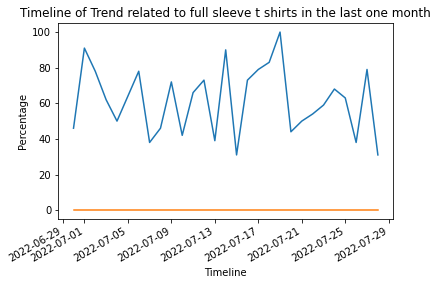



─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Product-Name: JACK AND JONES
Category ->Home->Clothing and Accessories->Topwear->T-shirts->Men's T-shirts
Product-Image-URL: https://rukminim1.flixcart.com/image/330/396/l3t2fm80/t-shirt/a/7/a/xxl-228453804-jack-jones-original-imageuj79whd9szj.jpeg?q=50
Trends Extraction Links: 
https://www.youtube.com/watch?v=yi5KbLoDEUA
https://www.youtube.com/watch?v=J1wHXXk9Le4
https://www.youtube.com/watch?v=J1wHXXk9Le4
https://www.youtube.com/watch?v=J1wHXXk9Le4
https://www.youtube.com/watch?v=J1wHXXk9Le4
https://www.youtube.com/watch?v=J1wHXXk9Le4
Score:  70092.66666666667


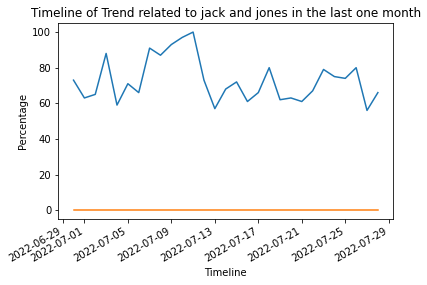



─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Product-Name: HALF SLEEVE SHIRT FOR MEN
Category ->Home->Clothing and Accessories->Topwear->Shirts->Men's Shirts->Casual Shirts
Product-Image-URL: https://rukminim1.flixcart.com/image/330/396/xif0q/shirt/1/l/t/m-c1276-gespo-original-imafw2gqdztqdkyu-bb.jpeg?q=50
Trends Extraction Links: 
https://www.youtube.com/watch?v=xITMQ48Q0Ts
https://www.youtube.com/watch?v=dwI9UVZC7VQ
https://www.youtube.com/watch?v=hUkysyvnNS4
https://www.youtube.com/watch?v=d3AZhUZZJ4E
https://www.youtube.com/watch?v=-efMGXNcTi8
https://www.youtube.com/watch?v=-efMGXNcTi8
Score:  53.444444444444436


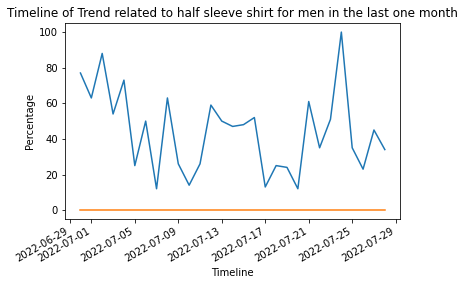



─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Product-Name: PLAIN T SHIRTS FOR MEN
Category ->Home->Clothing and Accessories->Topwear->T-shirts->Men's T-shirts
Product-Image-URL: https://rukminim1.flixcart.com/image/330/396/xif0q/t-shirt/z/i/o/3xl-bmr-nvhen-z14-blive-original-imafvzphvdavtpxn-bb.jpeg?q=50
Trends Extraction Links: 
https://www.youtube.com/watch?v=ke272OIXcuY
https://www.youtube.com/watch?v=lyKHOSi8KvE
https://www.youtube.com/watch?v=NLHlE3Z4nFw
https://www.youtube.com/watch?v=eur-I7w2zUc
https://www.youtube.com/watch?v=eur-I7w2zUc
https://www.youtube.com/watch?v=eur-I7w2zUc
Score:  57.90404040404041


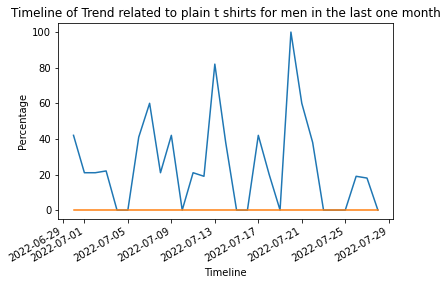



─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Product-Name: FULL SLEEVE T SHIRTS FOR MEN
Category ->P->r->o->d->u->c->t-> ->N->o->t-> ->f->o->u->n->d-> ->i->n-> ->F->l->i->p->k->a->r->t
Product-Image-URL: Product Not found in Flipkart
Trends Extraction Links: 
https://www.youtube.com/watch?v=0SxdNqemjRk
https://www.youtube.com/watch?v=hu_wbKCAJMQ
https://www.youtube.com/watch?v=hu_wbKCAJMQ
https://www.youtube.com/watch?v=hu_wbKCAJMQ
https://www.youtube.com/watch?v=hu_wbKCAJMQ
https://www.youtube.com/watch?v=hu_wbKCAJMQ
Score:  49.2962962962963


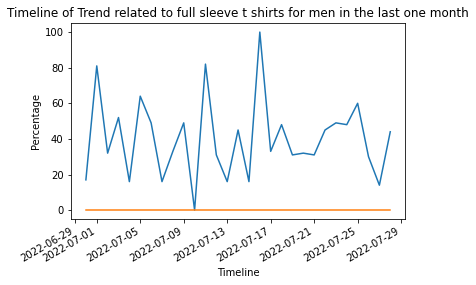



─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Product-Name: DENIM JACKET MEN
Category ->Home->Clothing and Accessories->Winter Wear->Jackets->Men's Jackets
Product-Image-URL: https://rukminim1.flixcart.com/image/330/396/l15bxjk0/jacket/3/z/k/s-no-mnt-7007-montrez-original-imagcs3dfrwkwwsx.jpeg?q=50
Trends Extraction Links: 
https://www.youtube.com/watch?v=jGpddEbU-4c
https://www.youtube.com/watch?v=ZgGvE6Dt3sA
https://www.youtube.com/watch?v=ATvfPcFSIOg
https://www.youtube.com/watch?v=hVzZQKcUa44
https://www.youtube.com/watch?v=hVzZQKcUa44
https://www.youtube.com/watch?v=hVzZQKcUa44
Score:  95.3846153846154


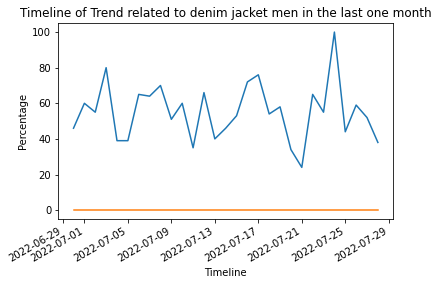



─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Product-Name: BEACH SHIRTS FOR MEN
Category ->P->r->o->d->u->c->t-> ->N->o->t-> ->f->o->u->n->d-> ->i->n-> ->F->l->i->p->k->a->r->t
Product-Image-URL: Product Not found in Flipkart
Trends Extraction Links: 
https://www.youtube.com/watch?v=Q9I8GwUAEZY
https://www.youtube.com/watch?v=FqrPkp37fNQ
https://www.youtube.com/watch?v=P6qv546CC78
https://www.youtube.com/watch?v=P6qv546CC78
https://www.youtube.com/watch?v=P6qv546CC78
https://www.youtube.com/watch?v=P6qv546CC78
Score:  66.11111111111111


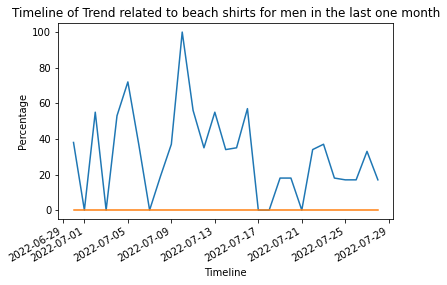



─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Product-Name: FLANNEL SHIRT
Category ->Home->Clothing and Accessories->Topwear->Shirts->Men's Shirts->Casual Shirts
Product-Image-URL: https://rukminim1.flixcart.com/image/330/396/l48s9zk0/shirt/5/p/n/m-msh-0373-tistabene-original-imagf6jwhbt4gznh.jpeg?q=50
Trends Extraction Links: 
https://www.youtube.com/watch?v=29f62_m3iec
https://www.youtube.com/watch?v=29f62_m3iec
https://www.youtube.com/watch?v=29f62_m3iec
https://www.youtube.com/watch?v=29f62_m3iec
https://www.youtube.com/watch?v=AVyuDxmFS6g
https://www.youtube.com/watch?v=oEEnUdk3Rkc
Score:  51786.53757736517


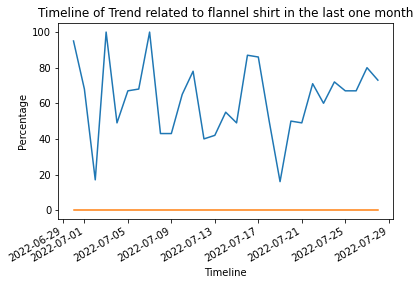



─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────



In [94]:
!pip install termcolor
 from termcolor import colored
for i in range(len(products)):
    print("Product-Name: "+colored(products[i].upper(),'red', attrs=['bold']))
    print("Category",end=' ')
    for word in flipkart_category_map[products[i]]:
        print('->'+word,end='')
    print()
    print("Product-Image-URL: "+flipkart_img_map[products[i]])
    print("Trends Extraction Links: ")
    for links in urls_dict[products[i]]:
        print(links)
    print("Score: ",sorted_score[products[i]])
    pytrends.build_payload([products[i]], cat=0, timeframe='today 1-m', geo='', gprop='')
    ans = pytrends.interest_over_time()
    plt.plot(ans)
    plt.title("Timeline of Trend related to "+products[i]+" in the last one month")
    plt.xlabel('Timeline')
    plt.ylabel('Percentage')
    plt.gcf().autofmt_xdate()
    plt.show()
    print()
    print()
    print(u'\u2500' * 125)
    print()